In [1]:
from xmltodict import parse
from urllib.request import urlopen
import plotly.express as px
import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re
import numpy as np

import matplotlib.image as mpimg

from collections import Counter
from sklearn import preprocessing
from datetime import date

from scipy import stats


import plotly.graph_objects as go



In [207]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.width", 100)
pd.set_option("expand_frame_repr", True)


In [2]:
reviews= pd.read_csv('reviews.csv')
reviews.info(verbose=True,null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229197 entries, 0 to 1229196
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 56.3+ MB


In [3]:
listings=pd.read_csv('listings.csv')
listings.info(verbose=True,null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24782 entries, 0 to 24781
Data columns (total 75 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   source                                        object 
 5   name                                          object 
 6   description                                   object 
 7   neighborhood_overview                         object 
 8   picture_url                                   object 
 9   host_id                                       int64  
 10  host_url                                      object 
 11  host_name                                     object 
 12  host_since                                    object 
 13  h

In [4]:
n=listings['neighbourhood_cleansed'].unique()
len(n)
#172 çeşit data var => 'neighbourhood'
#'neighbourhood_cleansed' kullanılması daha faydalı 15 çeşit var

15

In [9]:
pd.set_option('display.max_columns',50)
df=listings[["id","name","description",'calculated_host_listings_count','host_total_listings_count',"host_since","last_review","host_id","host_response_time","host_response_rate","host_is_superhost","latitude","longitude",'minimum_nights',"property_type","room_type","accommodates","bedrooms","beds","amenities","price","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","neighbourhood_cleansed","review_scores_value","instant_bookable","reviews_per_month"]]
df


id                                            name  \
0      17629440                                 ISOLA DEL CUORE   
1          2737                Elif's room in cozy, clean flat.   
2        103870             CASACHICA Your holiday home in Rome   
3          2903               Stay a night in Calisto6 B&B Rome   
4        104339                 Colorful apartment close MetroB   
...         ...                                             ...   
24777  28042301          Bright apartment close to the seaside.   
24778  41256298                        Nativo Suite Da Vinci 25   
24779  15476977                       Deluxe Doble Room,Bathtub   
24780  42446790                               Night in the wood   
24781  29825122  Moonlight attic/mansarda. Close to the airport   

                                             description  \
0      Stanchi da un viaggio in aereo 2 minuti e sent...   
1      10 min by bus you can get to Piazza Venezia or...   
2      <b>The space</b><br />The cosy and central Apa...   
3      <b>The space</b><br />Calisto6 B&B is an Itali...   
4      Delightful, bright and colorful apartment for ...   
...                                                  ...   
24777  Apartment on the 2nd floor with a large and ve...   
24778  Nativo Lodge è una realtà che si occupa di aff...   
24779  The room is located within an apartment on the...   
24780  Immersi nella natura e a contatto con gli anim...   
24781  Mansarda accogliente, situata in una nuova cos...   

       calculated_host_listings_count  host_total_listings_count  host_since  \
0                                   2                        3.0  2016-04-23   
1                                   6                        7.0  2008-09-18   
2                                   1                        3.0  2011-04-26   
3                                   3                        5.0  2008-09-28   
4                                   3                        3.0  2011-04-28   
...                               ...                        ...         ...   
24777                               1                        1.0  2018-08-26   
24778                               2                        4.0  2019-04-03   
24779                               8                       14.0  2016-09-19   
24780                               2                        4.0  2012-04-24   
24781                               2                        2.0  2018-11-05   

      last_review    host_id  host_response_time host_response_rate  \
0      2022-07-12   68534156  within a few hours               100%   
1      2015-05-28       3047  within a few hours                99%   
2      2022-08-25     535822      within an hour               100%   
3      2017-10-31       3280        within a day                56%   
4      2017-12-02     543054                 NaN                NaN   
...           ...        ...                 ...                ...   
24777  2021-09-20  211821938                 NaN                NaN   
24778  2020-08-05  252978577      within an hour                58%   
24779         NaN   95809238        within a day                50%   
24780  2022-05-29    2214620      within an hour               100%   
24781  2022-08-11  224343382      within an hour               100%   

      host_is_superhost  latitude  longitude  minimum_nights  \
0                     t  41.78984   12.60899               1   
1                     f  41.87136   12.48215               7   
2                     f  41.89711   12.50423               3   
3                     f  41.88824   12.46953               1   
4                     f  41.85585   12.48361               2   
...                 ...       ...        ...             ...   
24777                 f  41.64897   12.43349               2   
24778                 f  41.79978   12.30112               1   
24779                 f  41.79590   12.29634               1   
24780                 f  42.10042

In [212]:
df.sort_values(by=['host_total_listings_count'],ascending=False).head(400)

id  \
19349            52138947   
18630            50249845   
21764  604282954031654338   
18446            50053595   
18445            50053591   
...                   ...   
23151  669444855867303539   
23195  670003099658048889   
7815             18216482   
14688            38595645   
18474            50272053   

                                                                              name  \
19349  Apartment In Palazzo Nobiliare In One Of The Most Beautiful Streets Of Rome   
18630                                              Residence I Triangoli Apartment   
21764                                Kamchū Apartments single room Viale Libia #12   
18446                             Residence I Triangoli Nice One Bedroom Apartment   
18445                            Residence I Triangoli Apartment cozy stay monthly   
...                                                                            ...   
23151                                                    Colosseo Modern Apartment   
23195                                   iFlat | Modern apartment in the Monti area   
7815                                        iFlat | Rome at Your Feet with Terrace   
14688                                    iFlat | The Spanish Steps GRAND PENTHOUSE   
18474                                          iFlat | Art Apartment near Pantheon   

                                                                                               description  \
19349  Via Monserrato apartment, in one of the most beautiful and famous areas of Rome, just few steps ...   
18630  Residence I Triangoli, for longer stays in apartments (4 one-roomed, 153 two-roomed and 10 Three...   
21764  Comfortable classic room in a large apartment with living room and balcony in the prestigious sh...   
18446  Located in Rome's Casal Palocco area, Residence I Triangoli features a restaurant and 24-hour re...   
18445  Residence I Triangoli, for longer stays in apartments (4 one-roomed, 153 two-roomed and 10 Three...   
...                                                                                                    ...   
23151  Experience an unforgettable stay in Rome in this beautiful apartment<br /><br /><b>The space</b>...   
23195  This beautiful, newly re-furnished apartment is perfect for groups of friends and families who w...   
7815   This elegant apartment sits right on top of the historical center of Rome in a building with ele...   
14688  The Spanish Steps Grand Penthouse is a large and beautiful three story apartment that can fit up...   
18474  Splendid apartment in the heart of Rome, a few steps from the Pantheon and Piazza Navona. Finish...   

       calculated_host_listings_count  host_total_listings_count  host_since last_review  \
19349                             100                     2684.0  2018-07-12  2022-06-26   
18630                             100                     2684.0  2018-07-12         NaN   
21764                             100                     2684.0  2018-07-12         NaN   
18446                             100                     2684.0  2018-07-12         NaN   
18445                             100                     2684.0  2018-07-12         NaN   
...                               ...                        ...         ...         ...   
23151                             209                      380.0  2014-11-09         NaN   
23195                             209                      380.0  2014-11-09  2022-08-09   
7815                              209                      380.0  2014-11-09  2020-09-29   
14688                             209                      380.0  2014-11-09  2022-07-10   
18474                             209                      380.0  2014-11-09  2022-07-19   

         host_id  host_response_time host_response_rate host_is_superhost   latitude  longitude  \
19349  201739458  within a few hours                90%                 f  41.896961  12.468639   
18630  201739458 

In [16]:
df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''))

<ipython-input-16-53898abc05f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''))


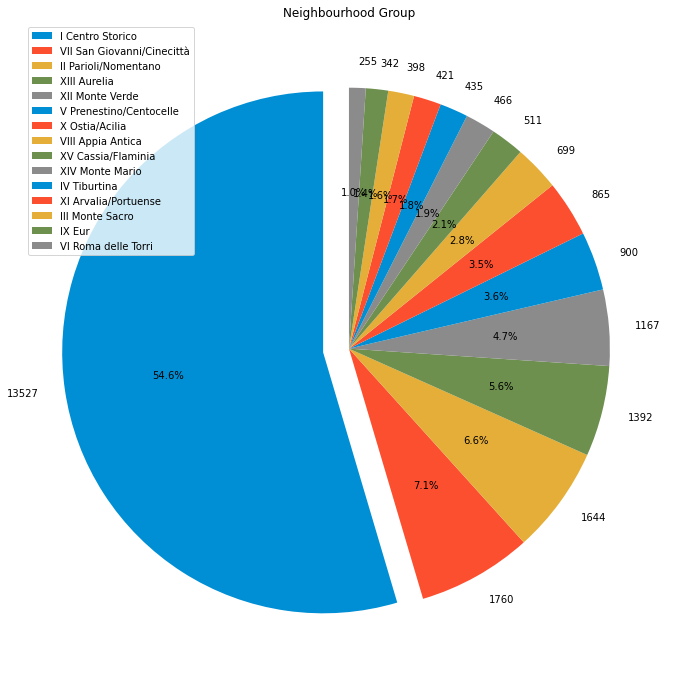

In [214]:
labels = df.neighbourhood_cleansed.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
shape = df.neighbourhood_cleansed.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [21]:
# ortalama fiyatlar
price_avg=(df.groupby('neighbourhood_cleansed')['price'].sum())/(df.neighbourhood_cleansed.value_counts())
price_avg.sort_values(ascending=False)  


XI Arvalia/Portuense          299.923990
I Centro Storico              204.945242
VII San Giovanni/Cinecittà    166.432386
II Parioli/Nomentano          151.283455
XIII Aurelia                  145.135776
XV Cassia/Flaminia            139.493151
IX Eur                        126.807018
XII Monte Verde               121.032562
XIV Monte Mario               103.512876
X Ostia/Acilia                 98.260116
VIII Appia Antica              98.121602
V Prenestino/Centocelle        93.277778
IV Tiburtina                   88.071264
III Monte Sacro                86.736181
VI Roma delle Torri            77.364706
dtype: float64

In [275]:
first500=df.sort_values(by='calculated_host_listings_count',ascending=False).head(500)
first500.loc[(df['calculated_host_listings_count']==209)]
first500.loc[(df['calculated_host_listings_count']<209)]

# 'calculated_host_listings_count' sütununu incelerken gördüm ki, ilk 209
# satırın hepsi aynı şirkete ait ve listing değerleri de hepsinde 209.
# ayrıca başka 209 değerini alan da yok dolayısıyla veride bir manipülasyon
# olduğunu düşündüm. İlk 209 satırı veriden çıkarmaya karar verdim

first_500_cleaned=df.sort_values(by='calculated_host_listings_count',ascending=False)[209:708]
first_500_cleaned

id                                           name  \
17329  45694333               Fonte Laurentina GREEN Apartment   
17327  45557665  Metro Cipro! Behind the Vaticano Apartment x4   
17631  46745616             Piazza di Spagna Elegant Apartment   
13874  35932678              NEW! Wonderful Loft x4 TRASTEVERE   
18565  50408032          Termini Central and Elegant Apartment   
...         ...                                            ...   
10311  24750179                Spanish Steps Terrace Penthouse   
7476   17428944                   Vatican Museum Modern Charms   
4993   10049542             Trastevere Luxury Design Apartment   
19047  51080205              Esquilino Exquisite 2BR Apartment   
2315    4186722                Piazza Mattei Elegant Apartment   

                                                                                               description  \
17329  Comfortable apartment for 2 people is situated in the Fonte Laurentina district and is particula...   
17327  Apartment located on the fourth floor of a building with a lift not suitable for disabled people...   
17631  Elegant and very central 55sqm apartment that can accommodate up to 4 people. Located on the sec...   
13874  Our charming loft perfect for 4 people and equipped with every comfort is located in a historic ...   
18565  Elegant 110 sqm apartment, which can accommodate up to 4 people, located on the fourth floor of ...   
...                                                                                                    ...   
10311  This penthouse is located on the top floor of a historic building in the very heart of Rome, wit...   
7476   They say that this is the perfect time to discover the Eternal City. We say it’s the perfect pla...   
4993   Look down at the charming Piazza San Calisto from the Juliette balcony of this apartment in an 1...   
19047  IMPORTANT: In response to COVID-19, this property has extended cleaning & disinfection measures ...   
2315   This stylish Rome apartment for rent is situated at a few steps from the Pantheon and Campo de F...   

       calculated_host_listings_count  host_total_listings_count  host_since last_review  \
17329                             141                      489.0  2016-09-21  2022-03-15   
17327                             141                      489.0  2016-09-21  2022-08-08   
17631                             141                      489.0  2016-09-21  2022-08-16   
13874                             141                      489.0  2016-09-21  2022-08-23   
18565                             141                      489.0  2016-09-21  2022-08-23   
...                               ...                        ...         ...         ...   
10311                              43                       97.0  2012-05-18  2022-08-23   
7476                               43                      108.0  2011-09-04  2022-07-03   
4993                               43                       97.0  2012-05-18  2022-08-21   
19047                              43                      108.0  2011-09-04  2022-06-17   
2315                               43                       97.0  2012-05-18  2022-05-22   

        host_id host_response_time host_response_rate host_is_superhost   latitude  longitude  \
17329  96122546     within an hour                99%                 f  41.792500  12.489880   
17327  96122546     within an hour                99%                 f  41.905710  12.447360   
17631  96122546     within an hour                99%                 f  41.907070  12.480470   
13874  96122546     within an hour                99%                 f  41.887300  12.470700   
18565  96122546     within an hour                99%                 f  41.899792  12.492935   
...         ...                ...                ...               ...        ...        ...   
10311   2405376     within an hour                92%                 f  41.910300  12.474420   
7476    1107433   

In [282]:
first500_rev=df.sort_values(by='number_of_reviews',ascending=False).head(500)
first500_rev

id                                                      name  \
13791  35636293                      38 Viminale Street - Camera Doppia 2   
1546    2399029                                          B&B  Rione Monti   
1741    2709785                                           B&B Rione Monti   
577      747656                              Pettinarihome Campo de FIORI   
853      865289                       Colonna's Home in the heart of Rome   
...         ...                                                       ...   
3094    5384413                              Peonia Charme Monti Colosseo   
547      492866                               Rome Center Trastevere WiFi   
5925   12529488                               Decor Inspiration Apartment   
316      356046                    Quiet and cozy  ... with a  balcony  !   
7071   15841389  Sleep Like an Italian Poet in Charming, Eclectic Retreat   

                                                                                               description  \
13791  La nostra Guest House grazie alla posizione strategica vi permetterà di visitare a piedi le mera...   
1546   Welcoming 2 double bedrooms, in Monti, Rome's most charming district    <br />a stone's throw fr...   
1741   Welcoming 2 double bedrooms, in Monti, Rome's most charming district    <br />a stone's throw fr...   
577    <b>The space</b><br />Our apartment 'a suite of 25 sqm. a few steps from Campo de Fiori, Ponte S...   
853    The Colonna house, in the heart of Campo de fiori, is located 300 meters from Piazza Navona and ...   
...                                                                                                    ...   
3094   Lovely apartment, elegant building with concierge, peaceful street placed near the Quirinale jus...   
547    **CHARMING APARTMENT IN THE HEART OF ROME!!**<br />Totally renewed with fine furniture very near...   
5925   Soggiorna in un meraviglioso appartamento di fine '800! Un soffitto decorato con tipiche allegor...   
316    Only a 4 min walk to the gorgeous Spanish Steps, 2 min to Piazza del Popolo and 4 min to Villa B...   
7071   Soak up the blend of period details and modern style at the former home of an influential Italia...   

       calculated_host_listings_count  host_total_listings_count  host_since last_review  \
13791                               2                       12.0  2014-08-14  2022-09-11   
1546                                2                        2.0  2014-02-15  2022-09-10   
1741                                2                        2.0  2014-02-15  2022-09-10   
577                                 3                        3.0  2012-10-20  2022-09-08   
853                                 6                        8.0  2012-10-15  2022-08-25   
...                               ...                        ...         ...         ...   
3094                                2                        3.0  2015-02-15  2022-08-26   
547                                16                       24.0  2012-05-22  2022-08-13   
5925                               36                       40.0  2014-04-01  2022-08-26   
316                                 1                        1.0  2012-02-24  2022-08-22   
7071                                3                        4.0  2013-04-22  2022-08-24   

        host_id  host_response_time host_response_rate host_is_superhost   latitude  longitude  \
13791  20028020      within an hour                98%                 t  41.900249  12.495944   
1546   12258559      within an hour               100%                 f  41.894260  12.490240   
1741   12258559      within an hour               100%                 f  41.894360  12.490250   
577     3925580      within an hour               100%                 t  41.892910  12.471450   
853     3873669      within an hour               100%                 f  41.895480  12.474850   
...         ...                 ...                ...               ...  

In [284]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(first500_rev, 
                        lat="latitude", 
                        lon="longitude",
                        color='neighbourhood_cleansed',
                        hover_name="name", 
                        hover_data=["name", "id",'price'],
                    
                        color_continuous_scale=color_scale,
                        size='number_of_reviews',
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<ipython-input-284-a4f3a7f01451>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [283]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(first500, 
                        lat="latitude", 
                        lon="longitude",
                        color='neighbourhood_cleansed',
                        hover_name="name", 
                        hover_data=["name", "id",'price'],
                    
                        color_continuous_scale=color_scale,
                        size='number_of_reviews',
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<ipython-input-283-2422a57a6d5e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [279]:
last_500=df.sort_values(by='calculated_host_listings_count',ascending=True).head(500)
last_500

id                                               name  \
17324  45555238              Roma, Vaticano Appartamento Interno 6   
14896  39212236                           Appartamento per artisti   
14901  39383625  Stanza"Audrey"privata, in casa condivisa Roma est   
14903  39214370                                           Casa EUR   
5733   12303629     Cosy loft Terrace, view, subway, Air/Con. wifi   
...         ...                                                ...   
6531   14828020       Comfortable double-room close Subway/Metro C   
13605  34384893                                   Tyche house Roma   
6529   14293819                       Apartment at the Roman Forum   
6528   14582141     Romantic near Saint Peter Moustache House Rome   
6527   14290993                  Lovely apartment amidst the trees   

                                                                                               description  \
17324  Alloggio silenzioso ,confortevole situato vicino la stazione di San Pietro e alla Città del Vati...   
14896  Appartamento completamente rinnovato e molto colorato, ideale per artisti, in una zona tranquill...   
14901  L'appartamento è "IN CONDIVISIONE" -  Molti mi chiedono cosa voglia dire, ma non sono l'unico su...   
14903  La casa, bella e spaziosa, è situata in una delle zone più interessanti di Roma frutto dell’arch...   
5733   Furnished penthouse with terrace and views of the city. Metro 10 meters from the door. Wi-Fi, Ai...   
...                                                                                                    ...   
6531   The room is both comfortable and equipped with a large bed. The bathroom is shared and you can u...   
13605  Delizioso appartamento ristrutturato e arredato,wifi gratuito,tv schermo piatto, condizionatore,...   
6529   Apartment in the center of Rome, adjacent to the historical and archaeological area and very clo...   
6528   A Romantic apartment in Rome, 5 minutes from Saint Peter, Vatican Museum, underground/subway. It...   
6527   Your own house in Rome, in a green, quiet area, with parking space. It's perfect for those trave...   

       calculated_host_listings_count  host_total_listings_count  host_since last_review  \
17324                               1                        1.0  2020-07-08  2022-09-03   
14896                               1                        2.0  2017-10-18  2022-08-30   
14901                               1                        4.0  2013-01-14  2022-05-10   
14903                               1                        1.0  2019-10-08  2022-08-23   
5733                                1                        1.0  2016-04-08  2022-09-10   
...                               ...                        ...         ...         ...   
6531                                1                        1.0  2015-08-15  2019-10-28   
13605                               1                        1.0  2019-05-03  2022-08-29   
6529                                1                        2.0  2015-08-07  2021-11-25   
6528                                1                        1.0  2016-08-17  2022-05-30   
6527                                1                        1.0  2015-03-31  2022-09-10   

         host_id  host_response_time host_response_rate host_is_superhost  latitude  longitude  \
17324  354777554      within an hour               100%                 f  41.89761   12.45384   
14896  155101013  within a few hours               100%                 f  41.89121   12.52979   
14901    4698527  within a few hours                90%                 f  41.94409   12.52833   
14903  300907835      within an hour               100%                 t  41.82442   12.47317   
5733    66338151      within an hour               100%                 t  41.86897   12.53015   
...          ...                 ...                ...               ...       ...        ...   
6531    41582396  within a few hours               100%     

In [217]:
roma_cleaned['reviews_per_month'].fillna(0,inplace = True)
roma_cleaned

id                                              name  \
0      17629440                                   ISOLA DEL CUORE   
1          2737                  Elif's room in cozy, clean flat.   
2        103870               CASACHICA Your holiday home in Rome   
3          2903                 Stay a night in Calisto6 B&B Rome   
5          3079         Cozy apartment  (2-4)with Colisseum  view   
...         ...                                               ...   
24775  29678754                             Villaggio naif Mimosa   
24776  22538683  La Casa dei Gelsi Casa Vacanze a Castel Gandolfo   
24778  41256298                          Nativo Suite Da Vinci 25   
24780  42446790                                 Night in the wood   
24781  29825122    Moonlight attic/mansarda. Close to the airport   

                                                                                               description  \
0      Stanchi da un viaggio in aereo 2 minuti e sentirsi come a Casa Vostra.<br />Potrete comodamente ...   
1      10 min by bus you can get to Piazza Venezia or Colosseum. All shops, gym, many trendy&local rest...   
2      <b>The space</b><br />The cosy and central Apartment Casachica can sleep up to 3 people who want...   
3      <b>The space</b><br />Calisto6 B&B is an Italian city style "bed and breakfast" in Rome offering...   
5      With the view of the Colisseum from the front door and windows and within easy walking distance ...   
...                                                                                                    ...   
24775  L'appartamento mimosa è un ampio bungalow con patio e parcheggio coperto, inserito nella nostra ...   
24776  Luminosissimo e spazioso (90 mq) appartamento sito in Pavona Laghetto, frazione di Castel Gandol...   
24778  Nativo Lodge è una realtà che si occupa di affitto case vacanze. Una nuova esperienza gestita da...   
24780  Immersi nella natura e a contatto con gli animali a pochi chilometri dal centro di Roma. Pernott...   
24781  Mansarda accogliente, situata in una nuova costruzione nei pressi di Ciampino. L'appartamento è ...   

         host_id  host_name  host_response_time host_response_rate host_is_superhost  latitude  \
0       68534156   Cristina  within a few hours               100%                 t  41.78984   
1           3047       Elif  within a few hours                99%                 f  41.87136   
2         535822   Fabrizio      within an hour               100%                 f  41.89711   
3           3280     Andrea        within a day                56%                 f  41.88824   
5           3504      Laura  within a few hours                96%                 t  41.89500   
...          ...        ...                 ...                ...               ...       ...   
24775  208160312    Giorgio      within an hour               100%                 f  42.04064   
24776  165551807  Gabriella      within an hour               100%                 t  41.72610   
24778  252978577   Ludovica      within an hour                58%                 f  41.79978   
24780    2214620      Marco      within an hour               100%                 f  42.10042   
24781  224343382    Lorenzo      within an hour               100%                 f  41.76746   

       longitude                      property_type        room_type  accommodates bathrooms_text  \
0       12.60899        Private room in rental unit     Private room             2  1 shared bath   
1       12.48215                       Private room     Private room             1      1.5 baths   
2       12.50423                 Entire rental unit  Entire home/apt             3         1 bath   
3       12.46953  Private room in bed and breakfast     Private room             4         1 bath   
5       12.49117                 Entire rental unit  Entire home/apt             4         1 bath   
...          ...                                ...              ...           .

In [202]:


df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude",
                        color='neighbourhood_cleansed',
                        hover_name="name", 
                        hover_data=["name", "id",'price'],
                    
                        color_continuous_scale=color_scale,
                        size='number_of_reviews',
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<ipython-input-202-a61c3a2e30dc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
first_500=df.sort_values(by=[''])

## datayı keşif kısmına göz atıp düzeltelim ilk adım olarak


#### Ev sahiplerinin daha kısa süreli konaklamalar yerine daha uzun süreli konaklamaları tercih ettiği mahalleler veya mahalle grupları nelerdir?

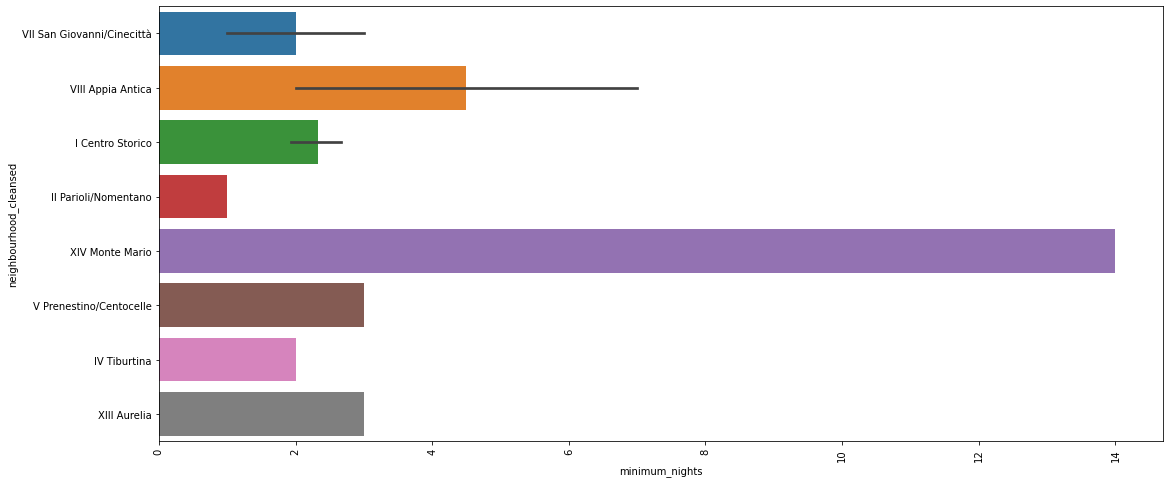

In [11]:
plt.figure(figsize=(18,8))
sns.barplot(x=df.minimum_nights[:25], y=df.neighbourhood_cleansed[:25]) 
plt.xticks(rotation=90)
plt.show()

#### Geri bildirimler daha pahalı yerlerde mi yoksa daha ucuz yerlerde mi  fazla?

In [13]:
reviewpricedf=df.sort_values('price', ascending = False)
reviewpricedf.head(10)

id                                             name  \
15261            40046748      Stanza Privata#Roma CentroVaticano#Superior   
23375  675205302913856352                       Super Appartamento SEBA n9   
3894              7398523               B & B Domus Viatoris-bagno interno   
13048            33242425                      National Aparments - Giulia   
3234              5835334               Bad and breakfast o casa vacanza !   
15173            39737845    Roma Centro#Idromassaggio#Soggiorno romantico   
8258             19494021  Trevi Ab Eterno: Amazing View of Trevi Fountain   
3252              6024188                  Vatican from Above with Terrace   
16127            41974253                             Coliseum Piano House   
15952            41807390             Royal Apartment in Piazza del Popolo   

                                             description  \
15261  Hotel di design, arredamento moderno, camera s...   
23375  Goditi una vacanza all'insegna dello stile in ...   
3894   Domus Viatoris B & B è situato nel cuore della...   
13048  Elegant apartment in the heart of Rome near th...   
3234   Relax in atticoromantica! <br />Comfort rooms ...   
15173  Hotel di design, arredamento moderno, Suite co...   
8258   Appartamento elegante e signorile, appena rist...   
3252   Stunning 85 m2 silent top floor apartment host...   
16127  Elegant apartment with a refined and chic styl...   
15952  Modern apartment, recently renovated. The Roya...   

       calculated_host_listings_count  host_total_listings_count  host_since  \
15261                               2                        2.0  2019-10-30   
23375                               1                        1.0  2019-12-18   
3894                                3                        3.0  2015-06-17   
13048                               4                        4.0  2019-03-19   
3234                                5                        6.0  2015-01-03   
15173                               2                        2.0  2019-10-30   
8258                                4                        5.0  2017-06-25   
3252                                1                        4.0  2015-04-09   
16127                               1                        1.0  2020-01-31   
15952                               1                        1.0  2020-01-24   

      last_review    host_id  host_response_time host_response_rate  \
15261         NaN  305428209                 NaN                NaN   
23375         NaN  318709689                 NaN                NaN   
3894   2015-09-14   36053883                 NaN                NaN   
13048         NaN  249872571                 NaN                NaN   
3234          NaN   25534662      within an hour               100%   
15173         NaN  305428209                 NaN                NaN   
8258   2022-09-09  136855894      within an hour                98%   
3252   2020-03-03   30889672                 NaN                NaN   
16127         NaN  332273020  a few days or more                 0%   
15952  2020-03-03  330343786                 NaN                NaN   

      host_is_superhost  latitude  longitude  minimum_nights  \
15261                 f  41.91452   12.46509               1   
23375                 f  41.90667   12.48337               1   
3894                  f  41.89916   12.44249               2   
13048                 f  41.90194   12.49506               2   
3234                  f  41.86955   12.49264               7   
15173                 f  41.91255   12.46574               1   
8258                  f  41.90002   12.48619               1   
3252                  f  41.91020   12.44995              31   
16127                 f  41.89003   12.50223               1   
15952                 f  41.90899   12.47410               1   

                            property_type        room_type  accommodates  \
15261              Room in boutique hotel     Private room 

In [43]:
data_0 =df[df['price'] >=133]
print(data_0)
data_1 =df[df['price'] <=133]
print(data_1)
# 133: price.mean()

                       id                                               name  \
3                    2903                  Stay a night in Calisto6 B&B Rome   
13                  16276                B&B Calisto6 great location in Rome   
16                 192859                  Coronari Apartment 1 with terrace   
19                 192908                Coronari Apartment 2 with city view   
20                  20587         DormiRoma - Cedro 4 Apartment - Trastevere   
...                   ...                                                ...   
24764            35537755                  Apartment in Villa Santa Caterina   
24768  639657132958603099  Villa ridente nel verde con piscina, tennis et...   
24769            28095841   Acquarella Resort - Apt Acquamarina - Trevignano   
24770             2820104                                      Villa L’Ulivo   
24779            15476977                          Deluxe Doble Room,Bathtub   

                                       

In [23]:
data_0.number_of_reviews.mean()

44.015307262569834

In [24]:
data_1.number_of_reviews.mean()

52.8106322743001

### bölgelerin haritası

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

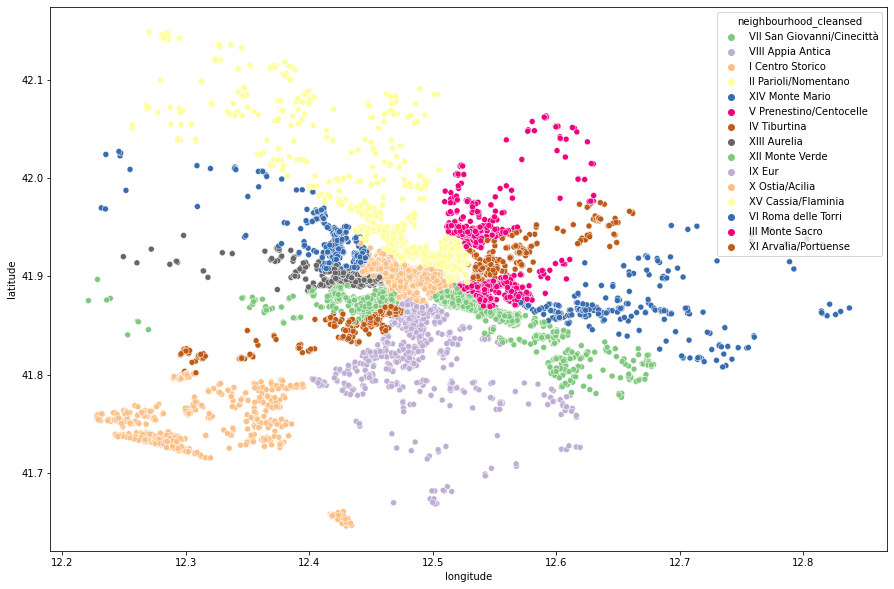

In [33]:
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_cleansed,palette='Accent')

### room type haritası

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

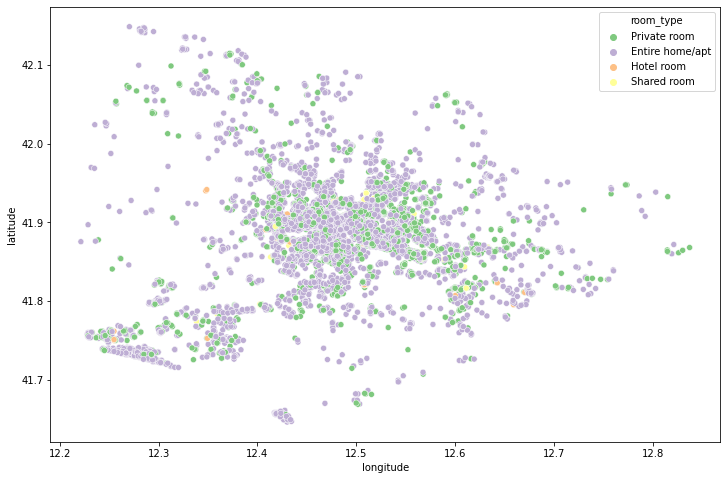

In [76]:
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type,palette='Accent')

### ev tipleri fiyat toplamı

In [55]:
df_n_roomtype = df.groupby(['neighbourhood_cleansed','room_type']).agg({'price':'sum'})
df_n_roomtype.head(10)

price
neighbourhood_cleansed room_type                  
I Centro Storico       Entire home/apt  2080195.29
                       Hotel room        119664.00
                       Private room      570008.00
                       Shared room         2427.00
II Parioli/Nomentano   Entire home/apt   149268.00
                       Hotel room          6098.00
                       Private room       90362.00
                       Shared room         2982.00
III Monte Sacro        Entire home/apt    24269.00
                       Hotel room           929.00

### 'privete room'da max ve min kazanç

In [57]:
df_n_roomtype = pd.pivot_table(df_n_roomtype, values='price', index=['neighbourhood_cleansed'], columns=['room_type'])

In [67]:
print(df_n_roomtype.sort_values('Private room', ascending = False).head(1))
print(df_n_roomtype.sort_values('Private room', ascending = True).head(1))

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
I Centro Storico             2080195.29    119664.0      570008.0       2427.0
room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
IX Eur                          31659.0      6888.0        4741.0         80.0


### 'Entire home/apt' max ve min kazanç

In [69]:
print(df_n_roomtype.sort_values('Entire home/apt', ascending = False).head(1))
print(df_n_roomtype.sort_values('Entire home/apt', ascending = True).head(1))

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
I Centro Storico             2080195.29    119664.0      570008.0       2427.0
room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
VI Roma delle Torri             13424.0         NaN        6144.0        160.0


### 'shared room'da max ve min kazanç

In [70]:
print(df_n_roomtype.sort_values('Shared room', ascending = False).head(1))
print(df_n_roomtype.sort_values('Shared room', ascending = True).head(1))

room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
II Parioli/Nomentano           149268.0      6098.0       90362.0       2982.0
room_type               Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_cleansed                                                        
XIV Monte Mario                 36909.0       550.0       10757.0         21.0
